In [47]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import utils
from tensorflow.keras import models
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [48]:
(x_train, _), (x_test, _) = mnist.load_data()

In [49]:
x_train.shape

(60000, 28, 28)

In [50]:

x_train_scaled = x_train.astype('float32') / 255.
x_test_scaled = x_test.astype('float32') / 255.

In [51]:
x_train_scaled = np.reshape(x_train_scaled, (len(x_train_scaled), 28, 28, 1))
x_test_scaled = np.reshape(x_test_scaled, (len(x_test_scaled), 28, 28, 1))

In [52]:
noise_factor = 0.5
x_train_noisy = x_train_scaled + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train_scaled.shape)
x_test_noisy = x_test_scaled + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test_scaled.shape)


In [53]:
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

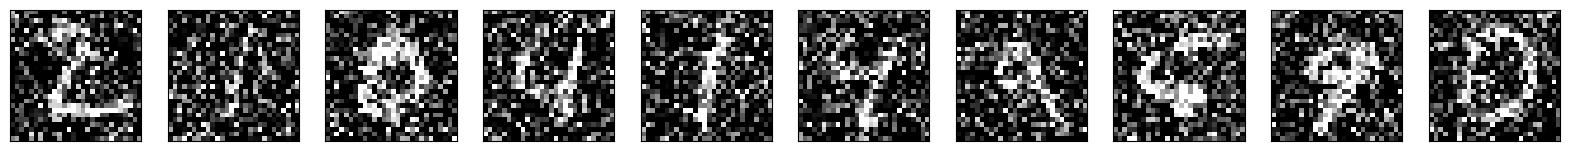

In [54]:

n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [55]:

input_img = keras.Input(shape=(28, 28, 1))
encoding_dim=28

In [56]:
#encoder
x = layers.Conv2D(16,(3,3),activation = 'relu',padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)


In [57]:
# Decoder
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)




In [58]:
autoencoder = keras.Model(input_img, decoded)

In [59]:

print('Name: DEEPIKA S         Register Number: 212222230028       ')
autoencoder.summary()


Name: DEEPIKA S         Register Number: 212222230028       


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 14, 14, 8)           │           1,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 7, 7, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 4, 4, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_3 (UpSampling2D)       │ (None, 8, 8, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 8, 8, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_4 (UpSampling2D)       │ (None, 16, 16, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 14, 14, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_5 (UpSampling2D)       │ (None, 28, 28, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 28, 28, 1)           │             145 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,385 (17.13 KB)

 Trainable params: 4,385 (17.13 KB)

 Non-trainable params: 0 (0.00 B)

In [60]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [61]:

autoencoder.fit(x_train_noisy, x_train_scaled,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_scaled))

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 84s 171ms/step - loss: 0.3472 - val_loss: 0.2026
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 174ms/step - loss: 0.1935 - val_loss: 0.1728
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 72s 153ms/step - loss: 0.1705 - val_loss: 0.1601
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 149ms/step - loss: 0.1596 - val_loss: 0.1530
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 69s 148ms/step - loss: 0.1528 - val_loss: 0.1475
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 147ms/step - loss: 0.1479 - val_loss: 0.1439
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 84s 150ms/step - loss: 0.1448 - val_loss: 0.1412
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 67s 144ms/step - loss: 0.1419 - val_loss: 0.1391
Epoch 9/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 68s 146ms/step - loss: 0.1396 - val_loss: 0.1365
Epoch 10/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 146ms/step - loss: 0.1379 - val_loss: 0.1351
Epoch 11/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 143ms/step - loss: 0.1360 - val_loss: 0.1336
Epoch 12/50
469/469

Text(0.5, 1.0, 'Training Loss vs. Validation Loss\\DEEPIKA S - 212222230028')

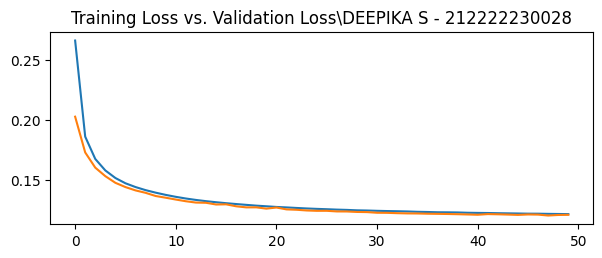

In [64]:
metrics=pd.DataFrame(autoencoder.history.history)
plt.figure(figsize=(7,2.5))
plt.plot(metrics['loss'], label='Training Loss')
plt.plot(metrics['val_loss'], label='Validation Loss')
plt.title('Training Loss vs. Validation Loss\DEEPIKA S - 212222230028')

In [65]:
decoded_imgs = autoencoder.predict(x_test_noisy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


Name:  DEEPIKA S        Register Number: 212222230028


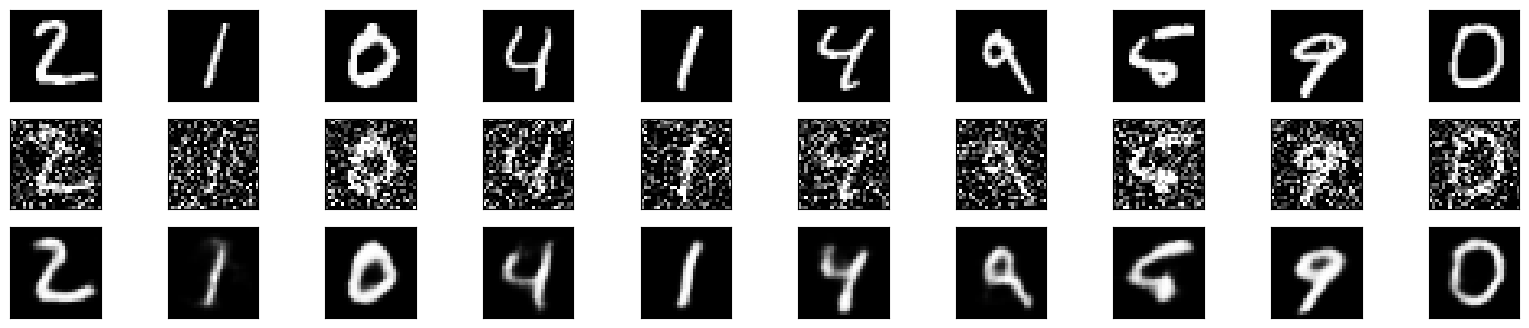

In [66]:
n = 10
print('Name:  DEEPIKA S        Register Number: 212222230028')
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(3, n, i)
    plt.imshow(x_test_scaled[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
     # Display noisy
    ax = plt.subplot(3, n, i+n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(3, n, i + 2*n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

